In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

### Task 1 c)

In [2]:
def rk3(x_init, x_end, y_init, h0, tol, f, alpha):
    x_values = [x_init]  
    y_values = [y_init] 
    h_values = [] 
    h = h0
    n = 0
    n_all = 0
    x = x_init
    y = y_init
    
    k1 = f(x,y)
    
    while (x_end - x) > 0:
        h = min(h, x_end - x)

        k1 = f(x, y)
        k2 = f(x + 0.5*h, y + 0.5*h*k1)
        k3 = f(x + 0.75*h, y + 0.75*h*k2)
        
        y_next = y + (1/9) * h * (2*k1 + 3*k2 + 4*k3)
        
        k4 = f(x + h, y_next)
        z_next = y + (1/24) * h * (7*k1 + 6*k2 + 8*k3 + 3*k4)

        est = np.linalg.norm(y_next - z_next)
        x += h
        
        if est < tol:
            x_values.append(x)
            y_values.append(y_next)
            h_values.append(h)
            y = y_next
            n += 1 
            k1 = k4
        
        n_all += 1
        h_next = alpha * h * (tol / est) ** (1 / 3)
        h = h_next
    
    return np.array(x_values), np.array(y_values), np.array(h_values), n, n_all 

In [3]:
def f(x,y):
    return np.array([y[1], -4*np.sin(2*x)])

alpha = 0.8
tol = 10**-7
x_init = 0 
y_init = np.array([0, 2])
x_end = 2*np.pi
h0 = 0.1

x_values, y_est, h_values, n, n_all = rk3(x_init, x_end, y_init, h0, tol, f, alpha)

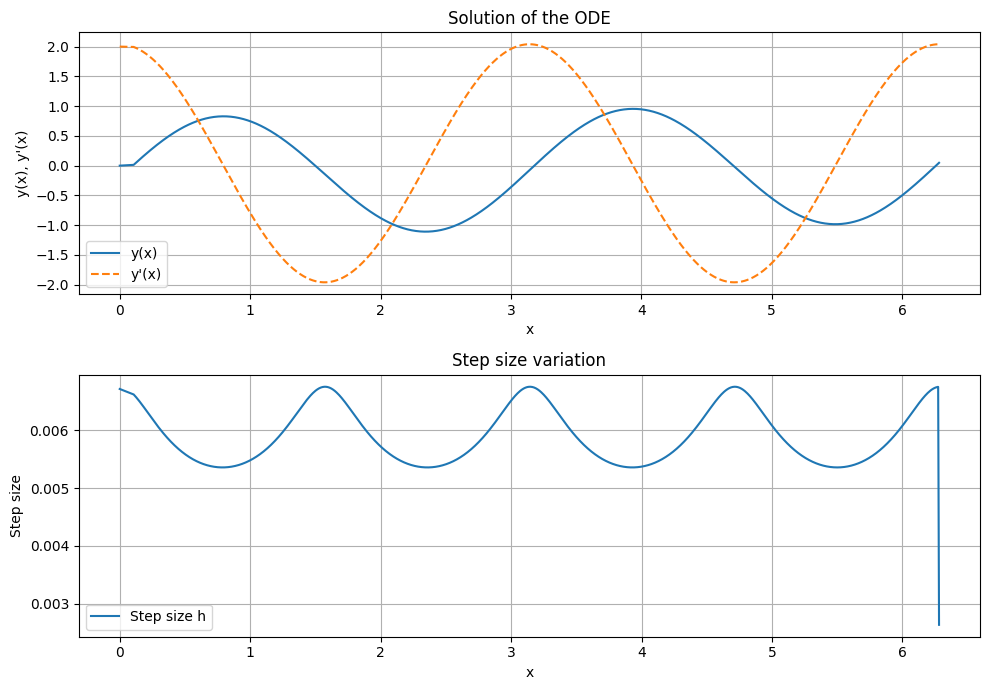

0.04783477546805539


In [4]:
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(x_values, y_est[:, 0], label='y(x)')
plt.plot(x_values, y_est[:, 1], label="y'(x)", linestyle='dashed')
plt.xlabel('x')
plt.ylabel("y(x), y'(x)")
plt.legend()
plt.title('Solution of the ODE')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(x_values[:-1], h_values, label='Step size h')
plt.xlabel('x')
plt.ylabel('Step size')
plt.legend()
plt.title('Step size variation')
plt.grid()

plt.tight_layout()
plt.show()
print(y_est[-1,0])

The second plot shows that the step size $h$ varies as a function of $x$. The step size is inversely proportional with the scalar error estimate which depends on the difference between $y_{n+1}$ and $z_{n+1}$. $y_{n+1}$ serves as the main numerical solution of the problem using the third order Runge-Kutta method. $z_{n+1}$ is another solution that includes an additional term. By computing the scalar error estimate, we can use the error estimate to adapt the step size. If the error is to large, the next will be smaller, and if the error is small, the next step will be larger. 

By other words: When the function $y(x)$ changes rapidly (you can see in the plots that the step size and $y'(x)$ is maximum for the same $x$), the step size will decrease to maintain accuracy. On the other hand, when $y(x)$ is not changing rapidly, the step size will increase to improve efficiency. 

### Task 1 d)

In [5]:
def exact_solution(x):
    return np.sin(2*x)

def error_calc(x_init, x_end, y_init, h0, tol, f, alpha):
    x_values, y_est, h_values, n, n_all = rk3(x_init, x_end, y_init, h0, tol, f, alpha)
    y_exact = exact_solution(x_values)
    error = np.max(np.abs(y_est[:,0] - y_exact)) 
    return error

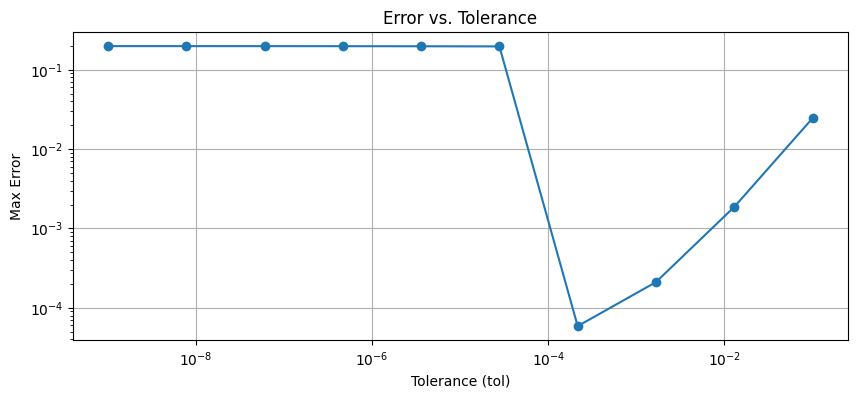

[1.98611708e-01 1.98555335e-01 1.98443811e-01 1.98223182e-01
 1.97786706e-01 1.96923223e-01 5.88170981e-05 2.11072687e-04
 1.86891490e-03 2.45151681e-02]


In [6]:
x_init = 0
x_end = 2 * np.pi
y_init = np.array([0, 2])
h0 = 0.1
alpha = 0.8

tol_values = np.logspace(-9,-1,10)
error_values = np.zeros(10)

for i in range(10): 
    error_values[i] = error_calc(x_init,x_end,y_init,h0,tol_values[i],f,alpha)

plt.figure(figsize=(10, 4))
plt.loglog(tol_values, error_values, marker='o')
plt.xlabel('Tolerance (tol)')
plt.ylabel('Max Error')
plt.title('Error vs. Tolerance')
plt.grid(True)
plt.show()
print(error_values)

wtf?

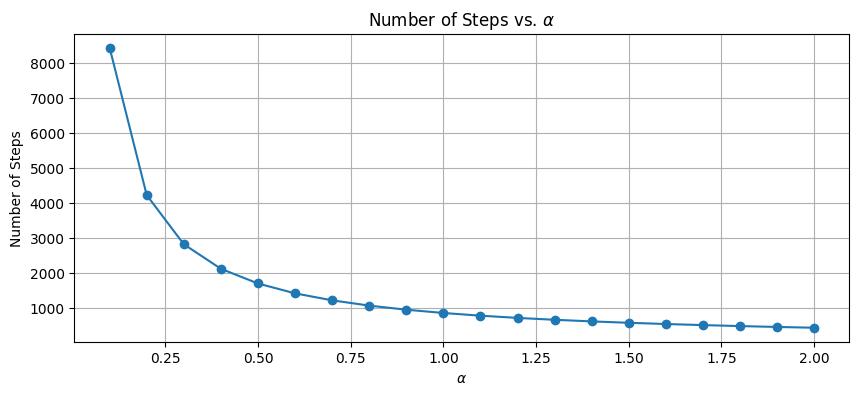

In [7]:
x_init = 0
x_end = 2 * np.pi
y_init = [0, 2]
h0 = 0.1
tol = 10**-7

alpha_values = np.linspace(0.1,2,20)
n_values = np.zeros(20)

for i in range(20):
    x_values, y_est, h_values, n, n_all = rk3(x_init, x_end, y_init, h0, tol, f, alpha_values[i])
    n_values[i] = n_all

plt.figure(figsize=(10, 4))
plt.plot(alpha_values, n_values, marker='o')
plt.xlabel(r'$\alpha$')
plt.ylabel('Number of Steps')
plt.title(r'Number of Steps vs. $\alpha$')
plt.grid(True)
plt.show()

This plot shows the number of steps taken as a function of $\alpha$. We see that for a relative small $\alpha$ the number of steps becomes really high, thus reducing efficiency . For a relative big alpha the number of steps become smaller, but when $h$ becomes larges, which it does by increasing the $alpha$, the solver skips over regions where the function might change rapidly where the $h$ should be small. In conclution, small $\alpha$ decreases efficiency and large $\alpha$ decreases accuracy. A balanced $\alpha$ equal to $0.8$ is used in task 1 c).

### Task 1 e)

In [8]:
def secant_method(g, z0, z1, tol):
    z_calc_values = []
    
    z = z0 
    z_next = z1
    z_calc = 0

    while np.abs(z_next - z) > tol:
        z_calc = (z*g(z_next) - z_next*g(z))/(g(z_next) - g(z))
        z = z_next 
        z_next = z_calc
        z_calc_values.append(z_calc)
    
    root = z_calc
    return root, np.array(z_calc_values)

In [9]:
def g(z):
    return z + np.sin(z) + np.cos(z)

root, root_list = secant_method(g, z0=1.0, z1=2.0, tol = 10**-9)
print(f'The estimatet root for g is: {np.round(root,3)}')
diff = g(root) - 0 
print(f'The error is {np.round(diff,18)}')

The estimatet root for g is: -0.457
The error is 2.22e-16


### Task 1 f) 

In [10]:
def p(b, x_init, x_end, y_init, h0, tol, f, alpha):
    y_init = np.array([0,b])
    x_values, y_est, h_values, n, n_all = rk3(x_init, x_end, y_init, h0, tol, f, alpha)
    return y_est[-1,0]

def bvp_solver(x_init, x_end, h0, tol, f, alpha, b0, b1):

    g = lambda b: p(b, x_init, x_end, np.array([0,b]), h0, tol, f, alpha)
    
    b_root, b_root_values = secant_method(g, b0 ,b1 , tol=10**-9)
    y_est_list = []
    
    for i in range(len(b_root_values)):
        y_init = np.array([0,b_root_values[i]])
        x_values, y_est, h_values, n, n_all = rk3(x_init, x_end, y_init, h0, tol, f, alpha)
        y_est_list.append(y_est)
    
    y_init_final = np.array([0,b_root])
    x_values, y_est_final, h_values, n, n_all = rk3(x_init, x_end, y_init_final, h0, tol, f, alpha)

    return x_values, y_est_final, b_root_values, np.array(y_est_list)

In [11]:
def f(x,y):
    return np.array([y[1], -4*np.sin(2*x)])

x_init = 0
x_end = 2 * np.pi
h0 = 0.1
tol = 10**-7
b0 = 0
b1 = 1.0

x_values, y_est_final, b_root_values, y_est_list = bvp_solver(x_init, x_end, h0, tol, f, alpha, b0, b1)

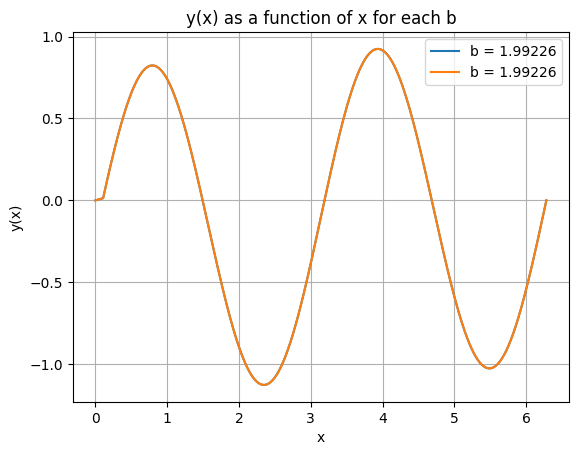

In [12]:
for i in range(len(b_root_values)):
    plt.plot(x_values, y_est_list[i][:, 0], label=f'b = {b_root_values[i]:.5f}')  

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('y(x) as a function of x for each b')
plt.legend()
plt.grid()
plt.show()


bla bla 

### Task 1 g)

In [13]:
def f(x,y):
    return np.array([y[1], y[0] + np.sin(x)])

x_init = 0
x_end = 12
h0 = 0.1
tol = 10**-7
b0 = 0
b1 = 1.0

x_values, y_est_final, b_root_values, y_est_list = bvp_solver(x_init, x_end, h0, tol, f, alpha, b0, b1)

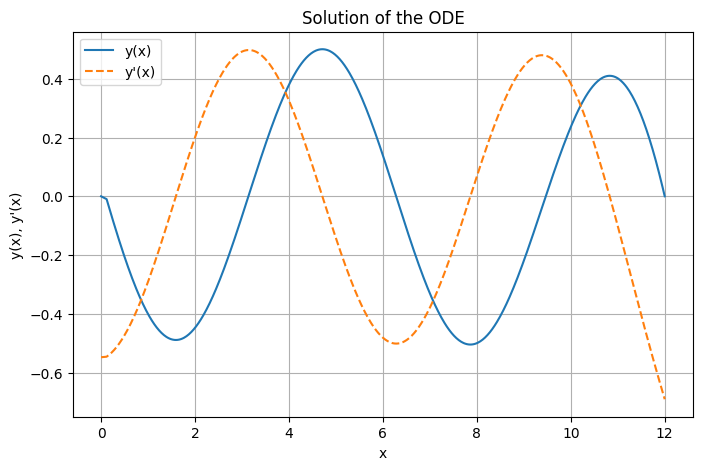

In [14]:
plt.figure(figsize=(8,5))
plt.plot(x_values, y_est_final[:, 0], label='y(x)')
plt.plot(x_values, y_est_final[:, 1], label="y'(x)", linestyle='dashed')
plt.xlabel('x')
plt.ylabel("y(x), y'(x)")
plt.legend()
plt.title('Solution of the ODE')
plt.grid()
plt.show()

bla bla 

In [15]:
def f(x,y):
    return np.array([y[1], y[0] + np.sin(x)])

def bc(ya,yb):
    return np.array([ya[0],yb[0]])

x = np.linspace(0,12,100)
y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))

res_a = solve_bvp(f, bc, x, y_a)
res_b = solve_bvp(f,bc,x,y_b)

y_plot_a = res_a.sol(x)[0]
y_plot_b = res_b.sol(x)[0]

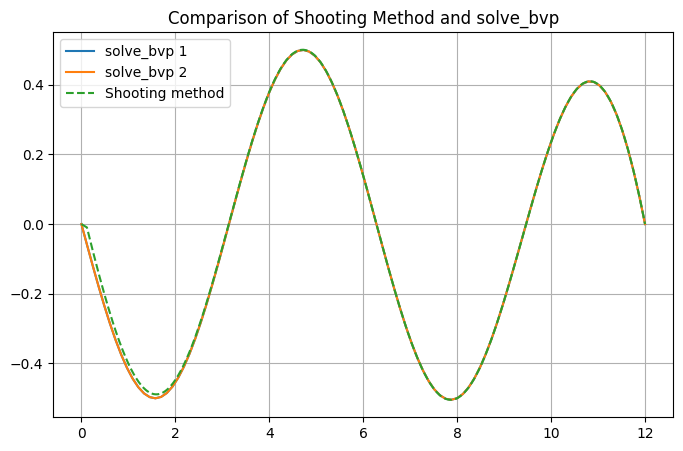

In [16]:
plt.figure(figsize = (8,5))
plt.title('Comparison of Shooting Method and solve_bvp')
plt.plot(x,y_plot_a,label = 'solve_bvp 1')
plt.plot(x,y_plot_b,label = 'solve_bvp 2')
plt.plot(x_values, y_est_final[:, 0], label='Shooting method',linestyle='dashed')
plt.legend()
plt.grid()
plt.show()


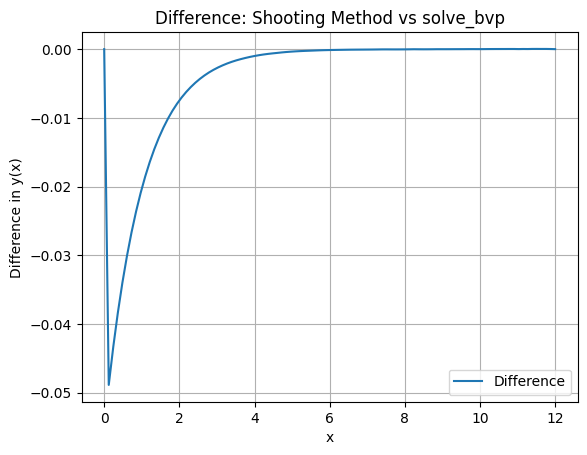

In [17]:
y_est_interp = np.interp(x, x_values, y_est_final[:, 0])

plt.plot(x, y_plot_a - y_est_interp, label='Difference')

plt.xlabel('x')
plt.ylabel('Difference in y(x)')
plt.legend()
plt.title('Difference: Shooting Method vs solve_bvp')
plt.grid()
plt.show()

bla bla